<a href="https://colab.research.google.com/github/MichalMichniak/ML2/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(x_train.shape, x_test.shape)

(25000, 10000) (25000, 10000)


In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu', input_shape=(16,)))
model.add(layers.Dense(1, activation='sigmoid', input_shape=(16,)))

In [4]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'], run_eagerly=True)

In [5]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 10000)
print(x_test.shape, x_val.shape)

(15000, 10000) (10000, 10000)


In [6]:
history = model.fit(x=x_train, y= y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
49/49 [==============================] - 5s 104ms/step - loss: 0.4758 - accuracy: 0.8116 - val_loss: 0.3565 - val_accuracy: 0.8714
Epoch 2/20
49/49 [==============================] - 4s 77ms/step - loss: 0.2829 - accuracy: 0.9013 - val_loss: 0.3174 - val_accuracy: 0.8690
Epoch 3/20
49/49 [==============================] - 5s 105ms/step - loss: 0.2224 - accuracy: 0.9207 - val_loss: 0.2798 - val_accuracy: 0.8837
Epoch 4/20
49/49 [==============================] - 4s 76ms/step - loss: 0.1886 - accuracy: 0.9321 - val_loss: 0.3233 - val_accuracy: 0.8667
Epoch 5/20
49/49 [==============================] - 4s 75ms/step - loss: 0.1653 - accuracy: 0.9420 - val_loss: 0.2877 - val_accuracy: 0.8830
Epoch 6/20
49/49 [==============================] - 5s 105ms/step - loss: 0.1479 - accuracy: 0.9477 - val_loss: 0.3172 - val_accuracy: 0.8726
Epoch 7/20
49/49 [==============================] - 4s 76ms/step - loss: 0.1340 - accuracy: 0.9543 - val_loss: 0.3193 - val_accuracy: 0.8757
Epoch 8/20

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

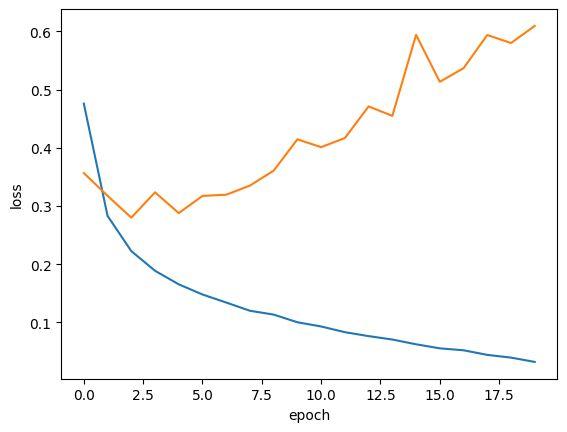

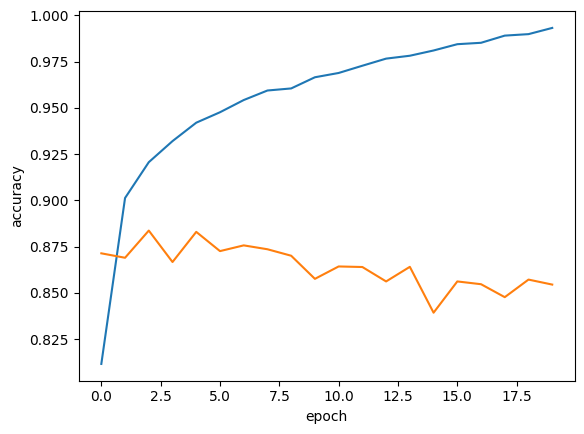

In [8]:
import matplotlib.pyplot as plt

plt.plot(history_dict['loss'], label = "training loss")
plt.plot(history_dict['val_loss'], label = "validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

plt.plot(history_dict['accuracy'], label = "training accuracy")
plt.plot(history_dict['val_accuracy'], label = "validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

Hyperparameters

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu', input_shape=(16,)))
model.add(layers.Dense(1, activation='sigmoid', input_shape=(16,)))

In [10]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'], run_eagerly=True)

In [11]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model.fit(x_train, y_train, epochs=20, callbacks=[callbacks])

Epoch 1/20
782/782 [==============================] - 28s 36ms/step - loss: 0.3209 - accuracy: 0.8701
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.9183
Reached 90% accuracy so cancelling training!
782/782 [==============================] - 29s 37ms/step - loss: 0.2136 - accuracy: 0.9183


In [ ]:

from keras import models
from keras import layers
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
# alternatively from scikeras.wrappers import KerasClassifier

def create_model():
    network = models.Sequential()
    network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    network.add(layers.Dense(16, activation='relu', input_shape=(16,)))
    network.add(layers.Dense(1, activation='sigmoid', input_shape=(16,)))

    network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'], run_eagerly=True)

    return network

model = KerasClassifier(build_fn=create_model)

par1_batch = [32, 64]
par2_epoch = [3, 5]

param_grid = dict(batch_size=par1_batch,
                  epochs=par2_epoch
                  )

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv = 3
                    )

grid_results = grid.fit(x_train,y_train)

print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

<ipython-input-7-09b1bb27bd35>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/3
521/521 [==============================] - 19s 35ms/step - loss: 0.3586 - accuracy: 0.8524
Epoch 2/3
521/521 [==============================] - 19s 37ms/step - loss: 0.2095 - accuracy: 0.9216
Epoch 3/3
261/261 [==============================] - 4s 14ms/step - loss: 0.3116 - accuracy: 0.8843
Epoch 1/3
521/521 [==============================] - 18s 35ms/step - loss: 0.3486 - accuracy: 0.8578
Epoch 2/3
521/521 [==============================] - 19s 36ms/step - loss: 0.2036 - accuracy: 0.9227
Epoch 3/3
261/261 [==============================] - 4s 15ms/step - loss: 0.3171 - accuracy: 0.8849
Epoch 1/3
521/521 [==============================] - 18s 35ms/step - loss: 0.3488 - accuracy: 0.8558
Epoch 2/3
521/521 [==============================] - 19s 37ms/step - loss: 0.2086 - accuracy: 0.9213
Epoch 3/3
261/261 [==============================] - 3s 13ms/step - loss: 0.3065 - accuracy: 0.8865
Epoch 1/5
521/521 [==============================] - 19s 37ms/step - loss: 0.3446 - accuracy: 